#### Pima Indians Diabetes Database
Link: https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

In [36]:
data = pd.read_csv('diabetes.csv')

In [37]:
data.shape

(768, 9)

In [38]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Verificando a presença de nulos.

In [39]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### Dividindo os dados em features e target e separando em treino e teste.

In [40]:
X = data.drop('Outcome', axis=1)
y = data['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Distribuição das características.
Podemos ver que algumas características possuem uma diferença significativa com as demais e isso pode acabar afetando alguns classificadores negativamente.

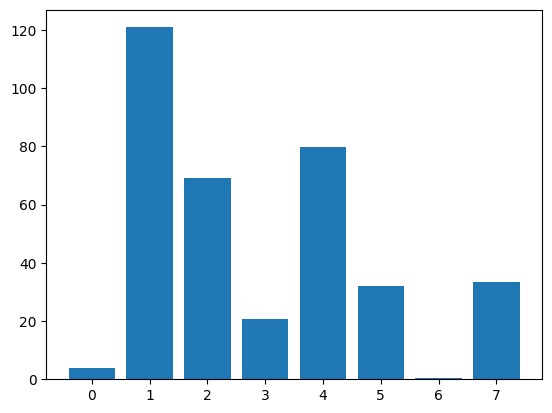

In [41]:
plt.bar(list(range(X.shape[1])), np.mean(X, axis=0))
plt.show()

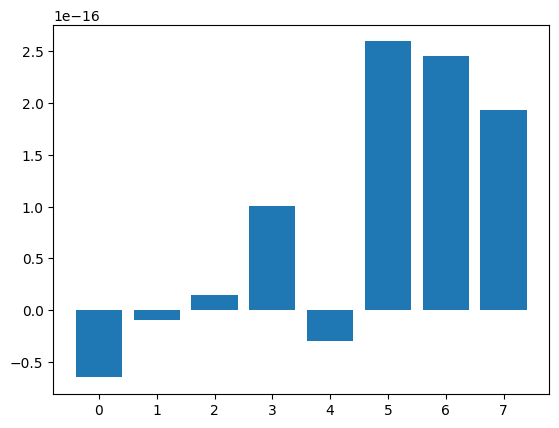

In [42]:
X_new = StandardScaler().fit_transform(X)

plt.bar(list(range(X.shape[1])), np.mean(X_new, axis=0))
plt.show()

### Criando um pipeline.

In [46]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('padronização', StandardScaler()),
    ('classificador', LogisticRegression())
])

In [47]:
from sklearn.model_selection import GridSearchCV

param_grid = {'classificador__C': [0.001, 0.01, 0.1, 1, 10, 100]}
grid = GridSearchCV(pipeline, param_grid, cv=5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('padronização', StandardScaler()),
                                       ('classificador',
                                        LogisticRegression())]),
             param_grid={'classificador__C': [0.001, 0.01, 0.1, 1, 10, 100]})

### Avaliando resultados.

In [49]:
print("Melhores parâmetros: ", grid.best_params_)
print("Acurácia do treinamento: ", grid.best_score_)
predictions = grid.predict(X_test)
print(classification_report(y_test, predictions))
print("Matriz de Confusão:\n", confusion_matrix(y_test, predictions))

Melhores parâmetros:  {'classificador__C': 10}
Acurácia do treinamento:  0.7655071304811408
              precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154

Matriz de Confusão:
 [[79 20]
 [18 37]]
